# Machin Learning Model on Titanic Dataset

## Agenda

1. [Titanic Dataset Description](#dataset)
2. [Import relevant packages](#package)
3. [Loading the data](#read)
4. [Data Wrangling/Explore the Dataset](#explore)
5. [Descriptive Statistics of the dataset](#describe)
6. [Exploratory Data Analysis(EDA)](#EDA)
    - 6.1. [Data Visualization with Matplotlib,Seaborn and Plotly](#visualize)
    - 6.2. [Feature Engineering](#feature)
7. [Spliting Dataset into Train and Test](#split)
8. [Learning Algorithm Selection](#algo)
    - 8.1 [Building Logistic Regression Model](#logreg)
    - 8.2 [Building Decision Tree Classifier Model](#dt)
    - 8.3 [Building Random Forest Classifier Model](#rf)
    - 8.4 [Building KNeighbors Classifier Model](#knn)
    - 8.5 [Building AdaBoost Classifier Model](#ada)
    - 8.6 [Building GradientBoosting Classifier Model](#gb)
    - 8.7 [Building XGB Classifier Model](#xgb)
    - 8.8 [Building LGBM Classifier Model](#lgbm)
    - 8.9 [Building SVM Classifier Model](#svm)
9. [Model Performance Assessment](#perform)
    - 9.1 [Confusion Matrix](#perform)
    - 9.2 [Accuracy](#perform)
    - 9.3 [Cost Sensitive Accuracy](#perform)
    - 9.4 [Precision, Recall and f1 Score](#perform)
    - 9.5 [Area under the ROC Curve(AUC)](#perform)
10. [Hyperparameter Tuning](#ht)
    - 10.1 [Grid Search Cross Validation](#gs)
    - 10.2 [Randomized Search Cross Validation](#rs)
11. [Comparing all Learning Algorithem after Hyperparameter Tuning](#comparehp)
12. [Stacking Models](#stacking)
    - 12.1 [Voting Classifier](#voting)
    - 12.2 [Mlxtend Classifier](#mlxtend) 
    - 12.3 [Vecstack](#vecstack)
13. [Model Explanability](#explain)
    - 13.1 [Eli5](#eli5)
    - 13.2 [LIME](#lime)
    - 13.3 [SHAP](#shap)
14. [Closing Remarks](#close)

## 1. Titanic Dataset Description <a id='dataset'>

<p/>
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Here, we will try to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (i.e. name, age, gender, socio-economic class, etc).
<p/>
<b>Data Fields:</b>
<br/>
PassengerId - Id of the Passenger.<br/>
Survival - 0 = No, 1 = Yes <br/>
Pclass: A proxy for socio-economic status (SES) -  1 = Upper, 2 = Middle, 3 = Lower. <br/>
Name - Name of the Passenger.<br/>
Sex - Male/Female. <br/>
Age - Age in Years. <br/>
SibSp:The dataset defines family relations in this way - Sibling = brother, sister, stepbrother, stepsister, Spouse = husband, wife. <br/>
Parch:The dataset defines family relations in this way - Parent = mother, father, Child = daughter, son, stepdaughter, stepson, Some children travelled only with a nanny, therefore parch=0 for them. <br/>
Ticket - Ticket Number.<br/>
Fare - Passenger Fare.<br/>
Cabin - Cabin Number.<br/>
Embarked - Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton.<br/>

## 2. Import relevent packages <a id='package'>

In [21]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly_express as px
import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier
from vecstack import stacking
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import eli5
from eli5.sklearn import PermutationImportance
import lime
import lime.lime_tabular
import shap

## 3. Loading the data <a id='read'>

We'll be working with a dataset Titanic that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/titanic/data)).

#### Through Dask

In [241]:
#Read data through Dask and compute time taken to read
t_start = time.time()
titanic_train = dd.read_csv('train_kaggle.csv')
titanic_test = dd.read_csv('test_kaggle.csv')
t_end = time.time()
print('dd.read_csv(): {} s'.format(t_end-t_start)) # time [s]

dd.read_csv(): 0.06999993324279785 s


#### Through Pandas

In [242]:
#Read data through Pandas and compute time taken to read
t_start = time.time()
titanic_train = pd.read_csv('train_kaggle.csv')
titanic_test = pd.read_csv('test_kaggle.csv')
t_end = time.time()
print('pd.read_csv(): {} s'.format(t_end-t_start)) # time [s]

pd.read_csv(): 0.0280001163482666 s


## 4. Data Wrangling/Explore the Dataset <a id='explore'>

In [243]:
#Getting the head of the train dataset
titanic_train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**We have 891 observations, 11 features, and our target variable, Survived**

In [244]:
#Getting the head of the test dataset
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [245]:
#Shape of the train dataset
titanic_train.shape

(891, 12)

In [246]:
#Shape of the test dataset
titanic_test.shape

(418, 11)

In [247]:
#Data Type of features for train dataset
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [248]:
#Data Type of features for test dataset
titanic_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [249]:
#Info of the train dataset
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [250]:
#Info of the test dataset
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [251]:
#Value counts of target variable
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [252]:
#Checking for null values in train dataset
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [253]:
#Checking for null values in test dataset
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [254]:
#Checking how many males and females survived
pd.crosstab(titanic_train.Sex,titanic_train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [255]:
#Checking survived passengers with respect to region 
pd.crosstab(titanic_train.Survived , titanic_train.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [256]:
#Checking survived passengers with respect to Passenger Class
pd.crosstab(titanic_train.Survived , titanic_train.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [257]:
#Performing Pandas profiling to understand quick overview of columns
report = pandas_profiling.ProfileReport(titanic_train)
#coverting profile report as html file
report.to_file('titanic_train.html')

from IPython.display import display,HTML,IFrame
display(HTML(open('titanic_train.html').read()))

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


## 5. Descriptive Statistics of the dataset <a id='describe'> 

In [258]:
#Summary statistics for the train dataset
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [259]:
#Summary statistics for the test dataset
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 6. Exploratory Data Analysis(EDA) <a id='EDA'> 

### 6.1. Data Visualization with Matplotlib,Seaborn and Plotly  <a id='visualize'>

##### Matplotlib

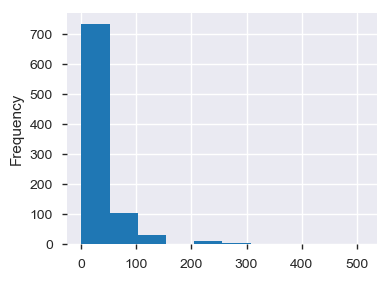

In [260]:
#Checking fare with histplot
plt.figure(figsize=(4,3))
titanic_train['Fare'].plot.hist()

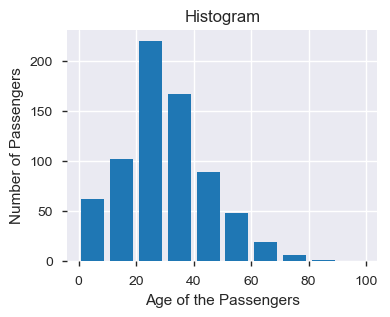

In [261]:
#Histogram for Age
age = titanic_train['Age']
bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.figure(figsize=(4,3))
plt.hist(age, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Age of the Passengers')
plt.ylabel('Number of Passengers')
plt.title('Histogram')
plt.show()

**Maximum no.of people are in the age of 20-40.There are very less no.of people in the age above 80!**

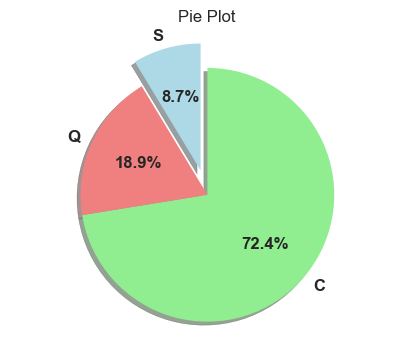

In [262]:
#Checking passengers from which region had aborded the most
x= titanic_train['Embarked'].value_counts()
labels = {'C' :'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'}
explode=(0,0,0.2)
colors = ['lightgreen','lightcoral','lightblue']
plt.figure(figsize=(5,4))
plt.pie(x.values,explode=explode,
  labels=labels,
  colors=colors,
  startangle=90,
  shadow= True,counterclock=False,textprops={'fontweight':'bold','fontsize':'large'},
  autopct='%1.1f%%')
plt.title('Pie Plot')
plt.axis('equal')
plt.show()

**Maximum passengesrs aborded were from Cherbourg!**

##### Seaborn

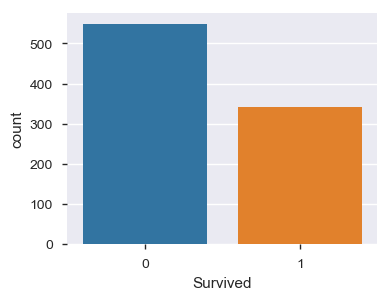

In [263]:
#Countplot for 'Survived' variable
plt.figure(figsize=(4,3))
sns.countplot(x='Survived', data=titanic_train)

 **We have a classification problem here, 'Survived' is binary, with 2 possible values, 0 and 1! So, the first thought would probably be to try a Logistic Regression model, which is THE fundamental classification algorithm! And the simplest one to start with is a model with only one feature, but which one to choose? Lets see:**

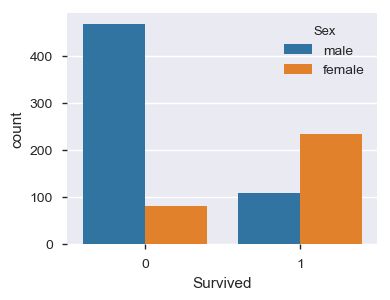

In [264]:
#Checking how many males/females survived
plt.figure(figsize=(4,3))
sns.countplot(x='Survived', hue='Sex', data=titanic_train)

**'Sex' looks like a very strong explanatory variable, and it will be our choice for our single feature Logistic Regression model!**

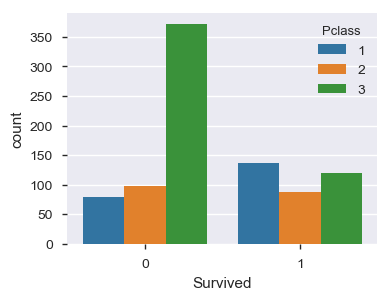

In [265]:
#Checking survival with respect to Passenger Class
plt.figure(figsize=(4,3))
sns.countplot(x='Survived', hue='Pclass', data=titanic_train)

**Large number of Passengers from 3rd Class could not able to survive!**

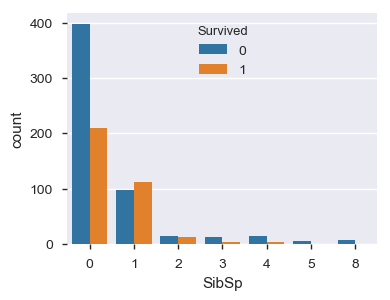

In [266]:
#Checking survival with respect to Sibling and Spouse
plt.figure(figsize=(4,3))
sns.countplot(x='SibSp', hue='Survived', data= titanic_train)

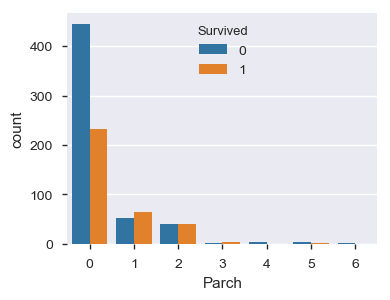

In [267]:
#Checking survival with respect to Parents and Childrain
plt.figure(figsize=(4,3))
sns.countplot(x='Parch', hue='Survived', data= titanic_train)

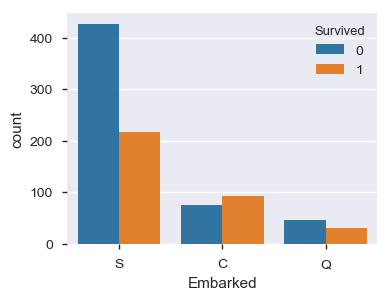

In [268]:
#Checking survival with respect to regions
plt.figure(figsize=(4,3))
sns.countplot(x='Embarked', hue='Survived', data= titanic_train)

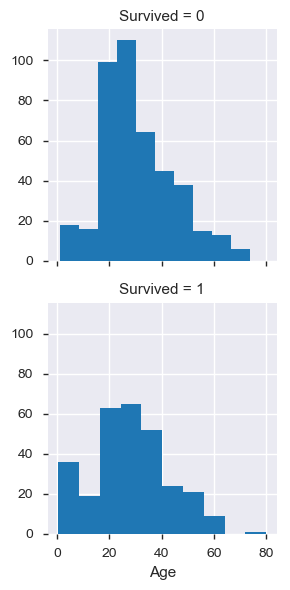

In [269]:
#Chcking which age group passangers were able to survive the most
g = sns.FacetGrid(titanic_train, row = 'Survived')
g = g.map(plt.hist,'Age')

**Most of the children got survived.Survival of adults is very low.Teenagers also mostly survived.Survival rate of old people is low!**

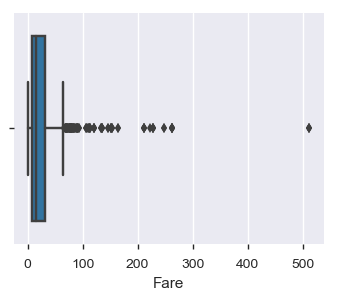

In [270]:
#Checking Fare with box plot
plt.figure(figsize=(4,3))
sns.boxplot(x='Fare',data=titanic_train)

**Mostly the fare is within 100.Potential outliers are also there which are more than 100!**

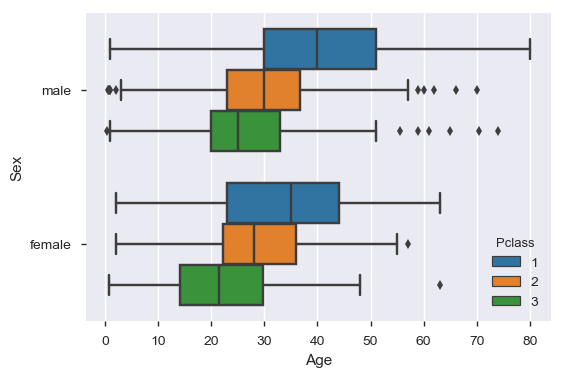

In [271]:
#Analyzing passenger's age with respect to sex and passenger class
plt.figure(figsize=(6,4))
sns.boxplot(x='Age',y='Sex',hue='Pclass',data=titanic_train)

**Most of the males and females are in pclass 1.None of the old women(above 60) are in Pclass 2 and Pclass 1.Most of the males and female adults prefer Pclass 2.There are some old males who prefer Pclass 3.Mostly childrens are in Pclass 1!**

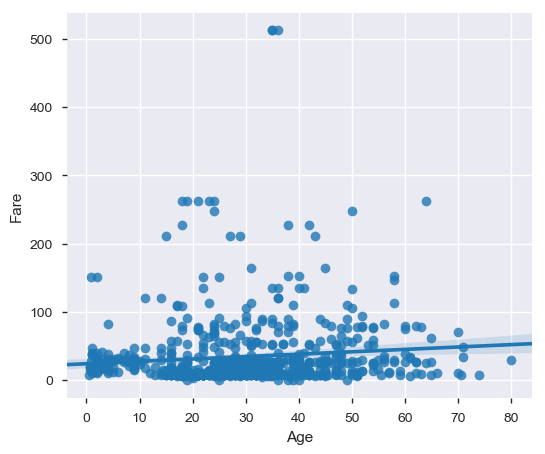

In [272]:
#Using reg plot for analysis
plt.figure(figsize=(6,5))
sns.regplot(x = 'Age', y= 'Fare',data =titanic_train)

**The correlation between Age and Fare is quite low.Most of the fare is within the range 10 to 300 inspite of the age.There are very few outliers!**

<Figure size 600x500 with 0 Axes>

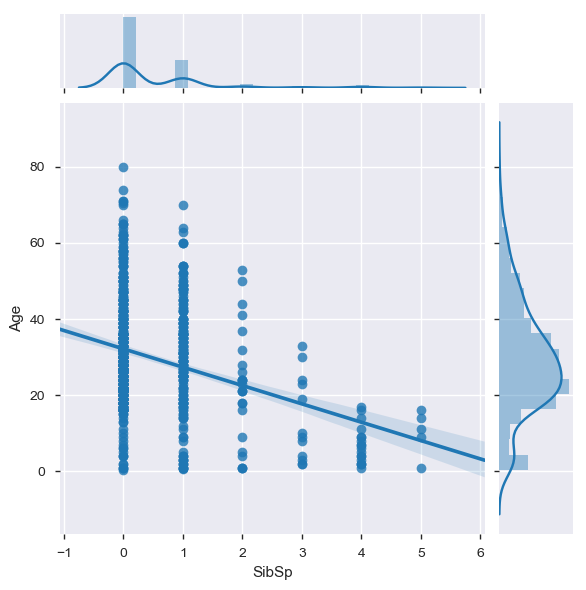

In [273]:
#Using joint plot for analysis
plt.figure(figsize=(6,5))
sns.jointplot(x = 'SibSp' , y = 'Age',data= titanic_train,kind='reg')

**Negative Correlaation.Lesser the age more the SibSp.More the age lesser the SibSp!**

<Figure size 600x500 with 0 Axes>

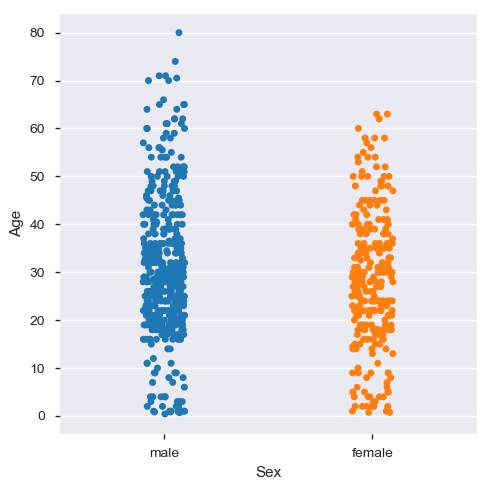

In [274]:
#Using cat plot for analysis
plt.figure(figsize=(6,5))
sns.catplot(x='Sex',y='Age',data=titanic_train)

**There are very less old females.More males are in the age between 18-40.More females are in the age between 15-30.Almost equal no.of male and female childrens!**

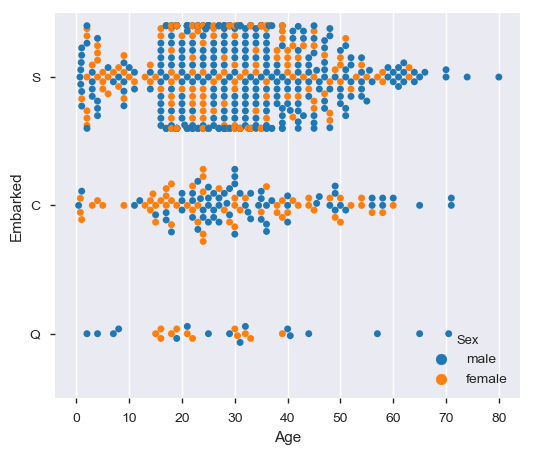

In [275]:
#Using swarm plot for analysis
plt.figure(figsize = (6,5))
sns.swarmplot(y = 'Embarked',x='Age',data=titanic_train,hue='Sex')

**Most of the males are embarked from Southampton.Females embarked from both Cherbourg and Southampton.Embarked from Queenstown is occupied by men and women in the age group 25-28!**

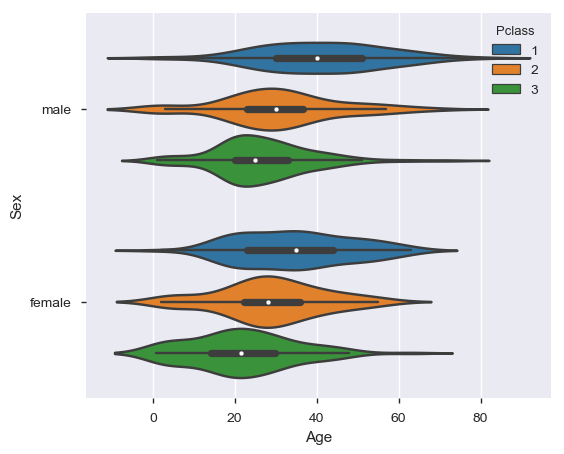

In [276]:
#Using violin plot for analysis
plt.figure(figsize=(6,5))
sns.violinplot(y = 'Sex',x ='Age',hue ='Pclass',data =titanic_train )

**The distribution of females in the age 20 to 40 are mostly in pclass 3.The distribution of female children are mostly in pclass 3.The distribution of male children are mostly in pclass 1 and 2.The distribution of old age males are mostly in pclass 1!**

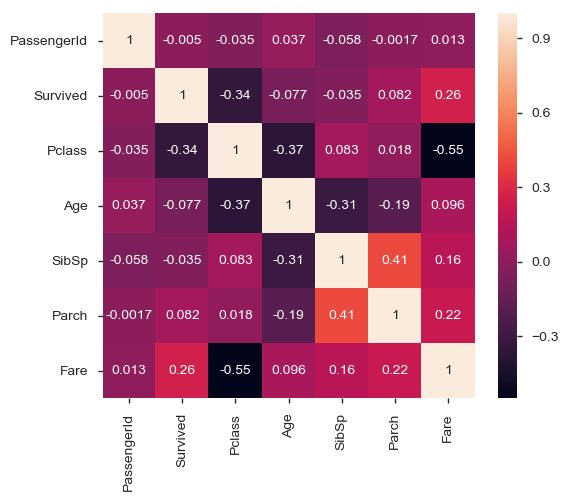

In [277]:
#Checking corelation between the features
corr=titanic_train.corr()
plt.figure(figsize=(6,5))
sns.heatmap(data= corr, annot=True)

C:\Users\pc\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\pc\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



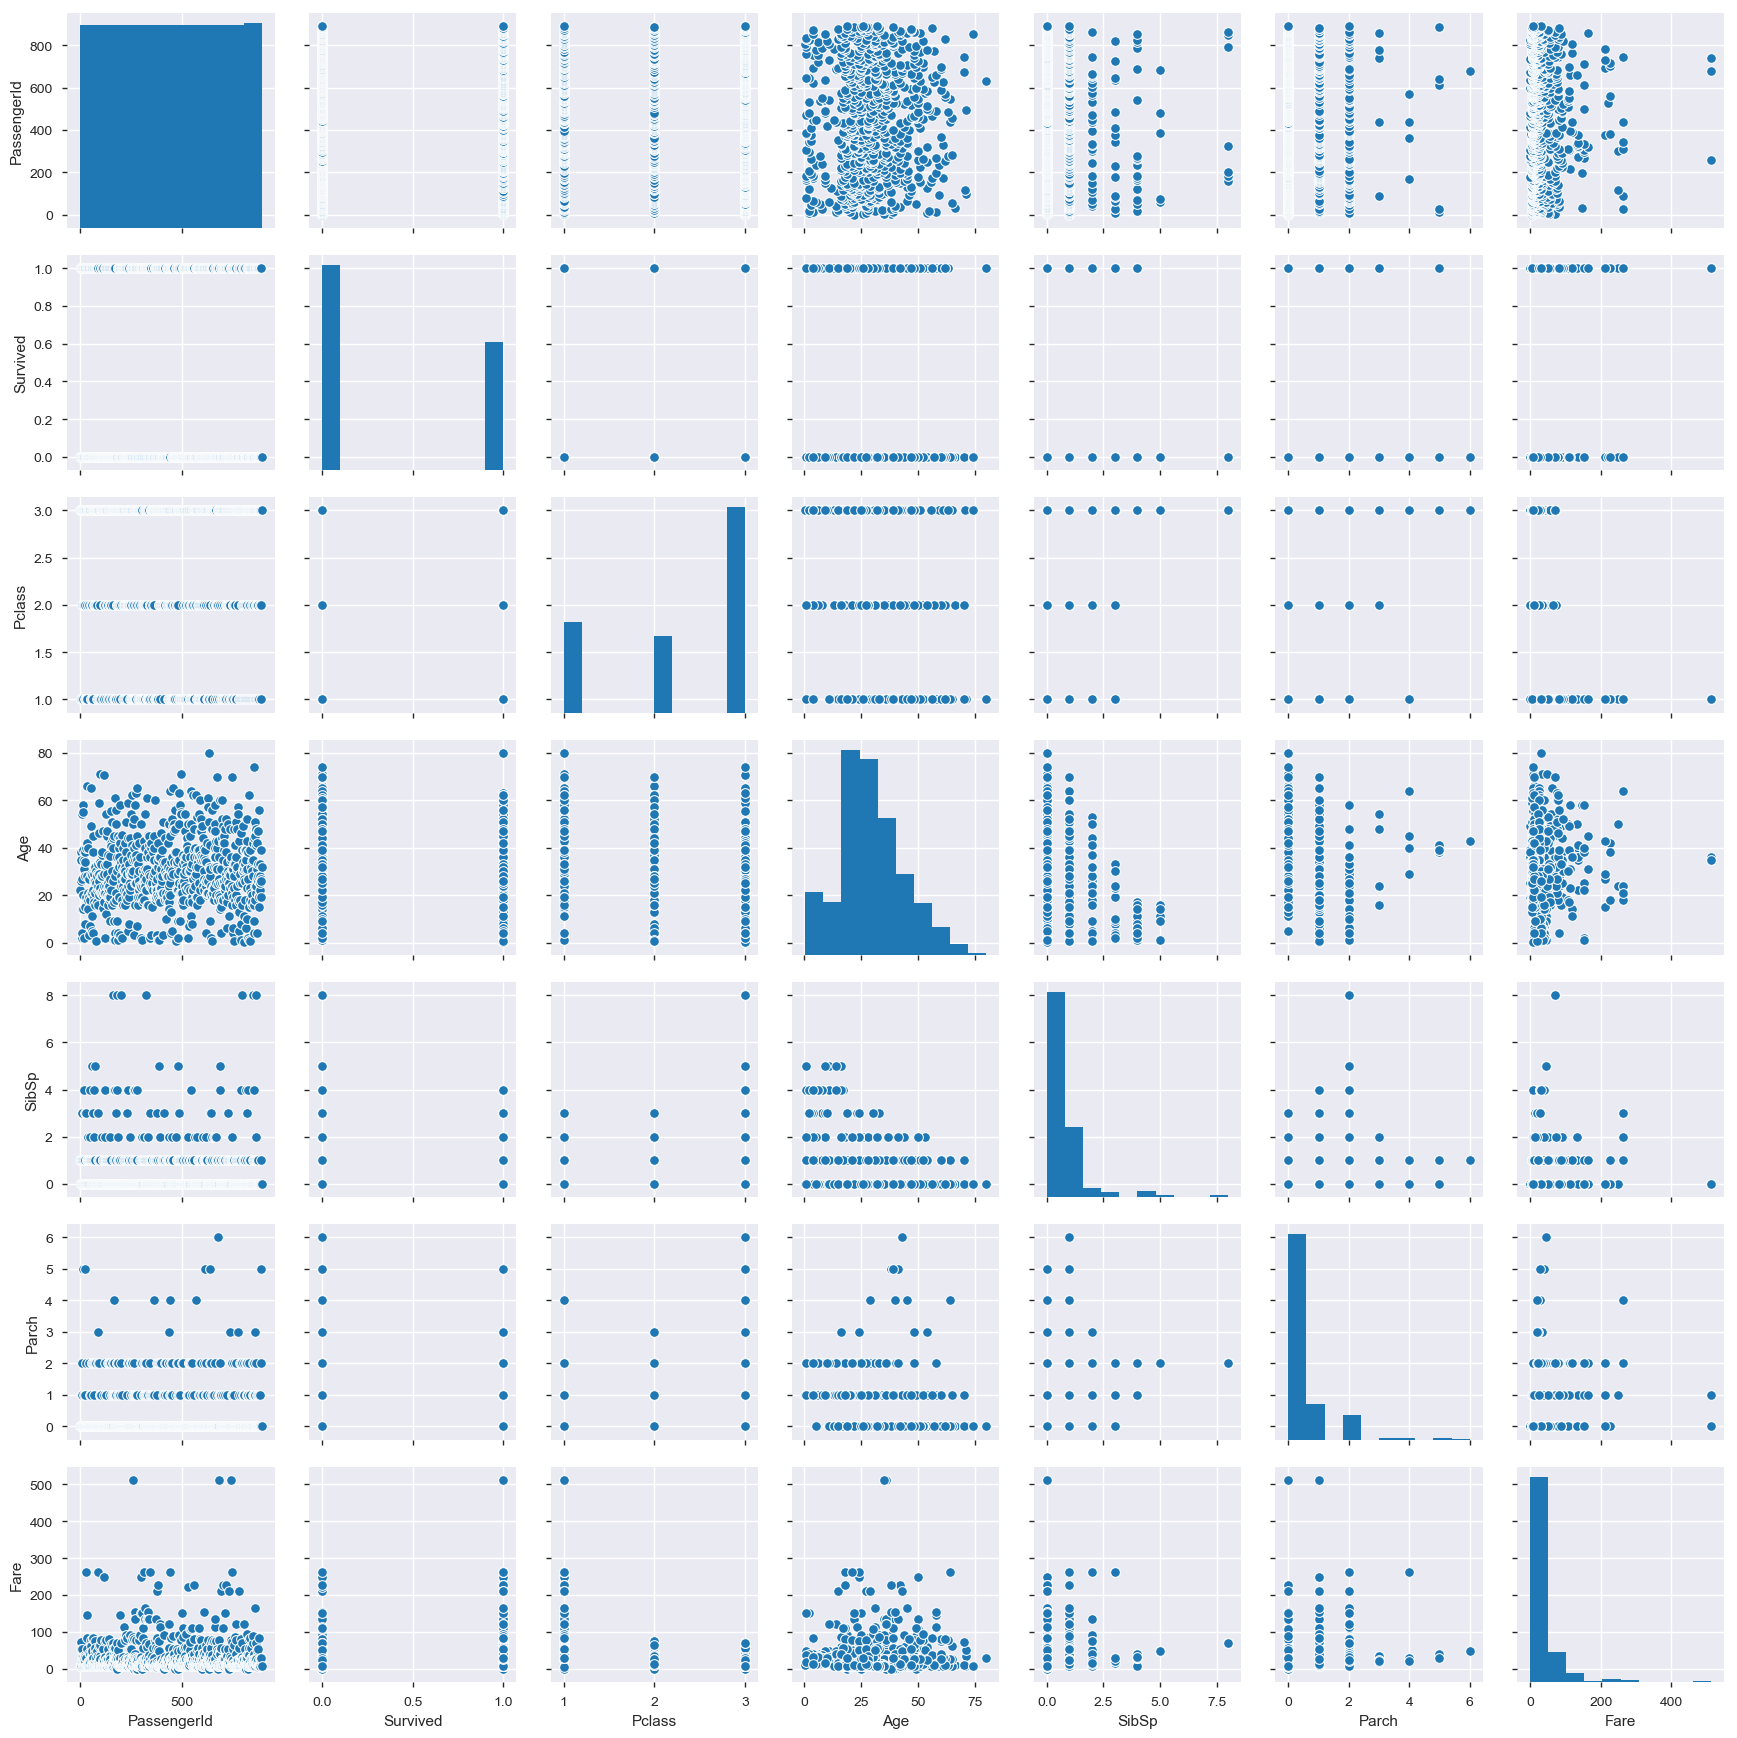

In [278]:
#Checking relation between the variables with pairplot
sns.pairplot(titanic_train)

**Main thing about pairplot is it will show the distribution of each numerical columns and also correlation between different columns will also be mentioned!**

### 6.2. Feature Engineering  <a id='feature'>

In [279]:
#Adding train and test data for feature engineering
titanic_train['Source']= 'train'
titanic_test['Source']= 'test'
titanic = pd.concat([titanic_train, titanic_test],ignore_index=True)
titanic.head(2)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Source,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,train,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,train,1.0,PC 17599


In [280]:
#Shape of the train, test and combined data
print(titanic_train.shape, titanic_test.shape, titanic.shape)

(891, 13) (418, 12) (1309, 13)


##### Data Imputation Techniques

In [281]:
#Checking missing values in the combined data
titanic.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Source            0
Survived        418
Ticket            0
dtype: int64

In [282]:
#Filling null values with median in age with respect to SibSp, Parch and Pclass
def fill_age_missing_values(titanic):
    Age_Nan_Indices = list(titanic[titanic["Age"].isnull()].index)

    #for loop that iterates over all the missing age indices
    for index in Age_Nan_Indices:
        #temporary variables to hold SibSp, Parch and Pclass values pertaining to the current index
        temp_Pclass = titanic.iloc[index]["Pclass"]
        temp_SibSp = titanic.iloc[index]["SibSp"]
        temp_Parch = titanic.iloc[index]["Parch"]
        age_median = titanic["Age"][((titanic["Pclass"] == temp_Pclass) & (titanic["SibSp"] == temp_SibSp) & (titanic["Parch"] == temp_Parch))].median()
        if titanic.iloc[index]["Age"]:
            titanic["Age"].iloc[index] = age_median
        if np.isnan(age_median):
            titanic["Age"].iloc[index] = titanic["Age"].median()
    return titanic

titanic = fill_age_missing_values(titanic)

C:\Users\pc\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [283]:
#Filling missing value in Embarked column with mode
titanic['Embarked'].mode()
titanic['Embarked']=titanic['Embarked'].fillna('S')

In [284]:
#Filling missing value in Fare column with median
titanic['Fare']=titanic['Fare'].fillna(titanic['Fare'].median())

##### Creating New Features

In [285]:
#Creating a new column according to the age group
titanic["Age"] = titanic["Age"].astype(int)
titanic.loc[(titanic['Age'] <= 2), 'Age Group'] = 'Baby' 
titanic.loc[((titanic["Age"] > 2) & (titanic['Age'] <= 10)), 'Age Group'] = 'Child' 
titanic.loc[((titanic["Age"] > 10) & (titanic['Age'] <= 19)), 'Age Group'] = 'Young Adult'
titanic.loc[((titanic["Age"] > 19) & (titanic['Age'] <= 60)), 'Age Group'] = 'Adult'
titanic.loc[(titanic["Age"] > 60), 'Age Group'] = 'Senior'
titanic["Age Group"] = titanic["Age Group"].map({"Baby": 0, "Child": 1, "Young Adult": 2, "Adult": 3, "Senior": 4})

In [286]:
#By adding SibSp and Parch we can have a new column like total family
titanic["Ftotal"] = 1 + titanic["SibSp"] + titanic["Parch"]

In [287]:
#By extracting title from passengers name we can create a new column Title which can help us in our analysis
title_titanic = [i.split(",")[1].split(".")[0].strip() for i in titanic["Name"]]
titanic["Title"] = pd.Series(title_titanic)
titanic["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [288]:
#Creating a new column called Title and assigning to multiple groups
titanic["Title"] = titanic["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic["Title"] = titanic["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
titanic["Title"] = titanic["Title"].astype(int)
titanic["Title"].unique()

array([2, 1, 0, 3], dtype=int64)

##### Categorical Encoding - One Hot Encoding.

In [289]:
#Applying one hot encoding to the catagorical variables
sex_titanic=pd.get_dummies(titanic['Sex'],prefix="Sex",drop_first=True)
pclass_titanic=pd.get_dummies(titanic['Pclass'],prefix="PClass",drop_first=True)
emb_titanic=pd.get_dummies(titanic['Embarked'],prefix="Emb",drop_first=True)
name_titanic=pd.get_dummies(titanic['Title'],prefix="Title",drop_first=True)

In [290]:
#Adding encoded columns to final data
titanic=pd.concat([titanic,sex_titanic,pclass_titanic,emb_titanic,name_titanic],axis=1)

In [291]:
#Dropping unnecessary columns from dataset
titanic=titanic.drop(['Sex','Pclass','Cabin','Embarked','SibSp','Parch','Age','Name','Title','Ticket','PassengerId'],axis=1)

In [292]:
titanic.head(2)

,Fare,Source,Survived,Age Group,Ftotal,Sex_male,PClass_2,PClass_3,Emb_Q,Emb_S,Title_1,Title_2,Title_3
0,7.2500,train,0.0,3,2,1,0,1,0,1,0,1,0
1,71.2833,train,1.0,3,2,0,0,0,0,0,1,0,0


##### Normalization

In [293]:
#Applying Feature Scaling in Fare caloumn to normalize the data
titanic['Fare']= np.log1p(titanic['Fare'])

In [294]:
titanic.head(2)

,Fare,Source,Survived,Age Group,Ftotal,Sex_male,PClass_2,PClass_3,Emb_Q,Emb_S,Title_1,Title_2,Title_3
0,2.110213,train,0.0,3,2,1,0,1,0,1,0,1,0
1,4.280593,train,1.0,3,2,0,0,0,0,0,1,0,0


In [295]:
#Feature engineering is done so will split the data again into train and test so that we can train the model
titanic_train = titanic.loc[titanic['Source']=="train"]
titanic_test = titanic.loc[titanic['Source']=="test"]

In [296]:
#Dropping Source column which we have created while combining the data 
titanic_train.drop(labels=["Source"],axis = 1,inplace=True)
titanic_test.drop(labels=["Source"],axis = 1,inplace=True)
titanic_test.drop(labels=["Survived"],axis = 1,inplace=True)

C:\Users\pc\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [297]:
#Shape of the train & test data
print(titanic_train.shape, titanic_test.shape)

(891, 12) (418, 11)


## 7. Spliting Dataset into Train and Test <a id='split'> 

In [298]:
#Assigning X and y variables
X = titanic_train.drop('Survived',1)
y = titanic_train['Survived']

In [299]:
#Splitting the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

## 8. Learning Algorithm Selection<a id='algo'> 

### 8.1. Building Logistic Regression Model <a id='logreg'>

In [300]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred= lr.predict(X_test)

In [301]:
#Coefficients for Logistic Regression
print(lr.coef_)
print(lr.intercept_)

[[ 0.41591083 -0.2582933  -0.40305635 -0.64464596 -0.51192835 -1.26310581
  -0.15820719 -0.2918555   0.07976907 -2.27034362 -1.64666182]]
[2.41277997]


In [302]:
#Accuracy Score
lr_acc = metrics.accuracy_score(lr_pred,y_test)
lr_acc

0.8491620111731844

In [303]:
#Train Score
lr_train=lr.score(X_train,y_train)
lr_train

0.8103932584269663

In [304]:
#Test Score
lr_test=lr.score(X_test,y_test)
lr_test

0.8491620111731844

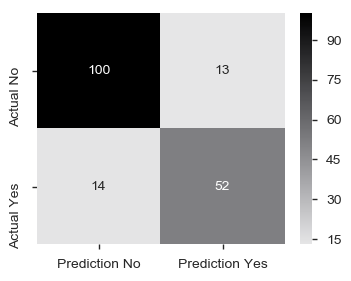

In [305]:
#Confusion Matrix
lr_conf=metrics.confusion_matrix(lr_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(lr_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [306]:
#Classification Report
print(metrics.classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       113
         1.0       0.80      0.79      0.79        66

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [307]:
#Null Accuracy
y_test.value_counts()
y_test.value_counts().head(1) / len(y_test)

0.0    0.636872
Name: Survived, dtype: float64

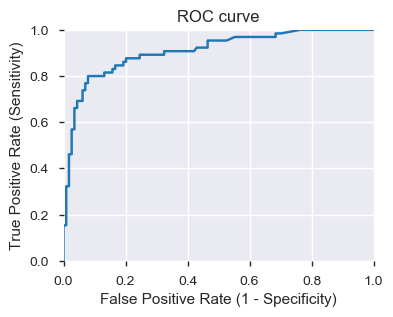

In [308]:
#ROC Curve
predict_probabilities = lr.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### 8.2. Building Decision Tree Classifier Model <a id='dt'>

In [309]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

In [310]:
#Accuracy Score
dt_acc = metrics.accuracy_score(dt_pred,y_test)
dt_acc

0.8435754189944135

In [311]:
#Train Score
dt_train=dt.score(X_train,y_train)
dt_train

0.9297752808988764

In [312]:
#Test Score
dt_test=dt.score(X_test,y_test)
dt_test

0.8435754189944135

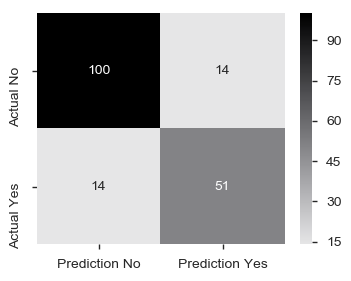

In [313]:
#Confusion Matrix
dt_conf=metrics.confusion_matrix(dt_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(dt_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [314]:
#Classification Report
print(metrics.classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       114
         1.0       0.78      0.78      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



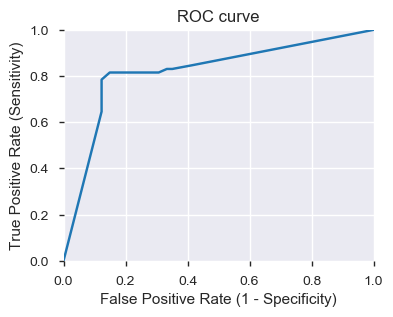

In [315]:
#ROC Curve
predict_probabilities = dt.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### 8.3. Building Random Forest Classifier Model <a id='rf'>

In [316]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [317]:
#Accuracy Score
rf_acc = metrics.accuracy_score(rf_pred,y_test)
rf_acc

0.8435754189944135

In [318]:
#Train Score
rf_train=rf.score(X_train,y_train)
rf_train

0.9297752808988764

In [319]:
#Test Score
rf_test=rf.score(X_test,y_test)
rf_test

0.8435754189944135

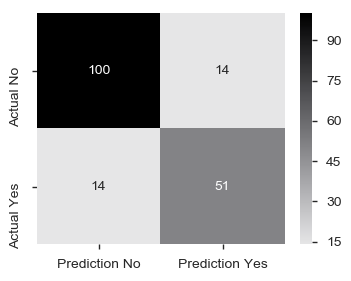

In [320]:
#Confusion Matrix
rf_conf=metrics.confusion_matrix(rf_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(rf_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [321]:
#Classification Report
print(metrics.classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       114
         1.0       0.78      0.78      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



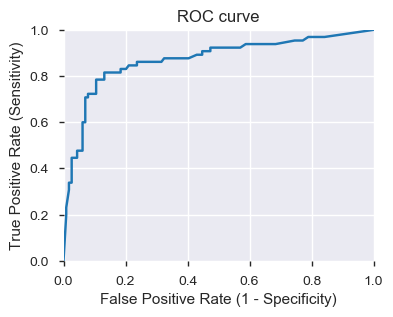

In [322]:
#ROC Curve
predict_probabilities = rf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### 8.4. Building KNeighbors Classifier Model <a id='knn'>

In [323]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [324]:
#Accuracy Score
knn_acc = metrics.accuracy_score(knn_pred,y_test)
knn_acc

0.8491620111731844

In [325]:
#Train Score
knn_train=knn.score(X_train,y_train)
knn_train

0.8525280898876404

In [326]:
#Test Score
knn_test=knn.score(X_test,y_test)
knn_test

0.8491620111731844

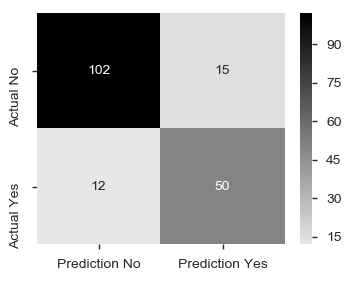

In [327]:
#Confusion Matrix
knn_conf=metrics.confusion_matrix(knn_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(knn_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [328]:
#Classification Report
print(metrics.classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       117
         1.0       0.77      0.81      0.79        62

    accuracy                           0.85       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



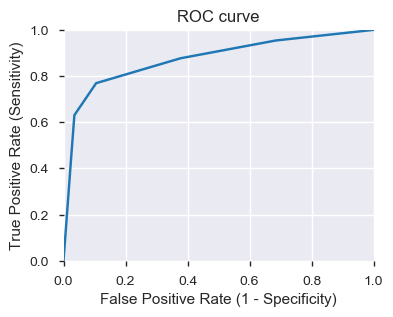

In [329]:
#ROC Curve
predict_probabilities = knn.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### 8.5. Building AdaBoost Classifier Model <a id='ada'>

In [330]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
ab_pred = ab.predict(X_test)

In [331]:
#Accuracy Score
ab_acc = metrics.accuracy_score(ab_pred,y_test)
ab_acc

0.8379888268156425

In [332]:
#Train Score
ab_train=ab.score(X_train,y_train)
ab_train

0.8314606741573034

In [333]:
#Test Score
ab_test=ab.score(X_test,y_test)
ab_test

0.8379888268156425

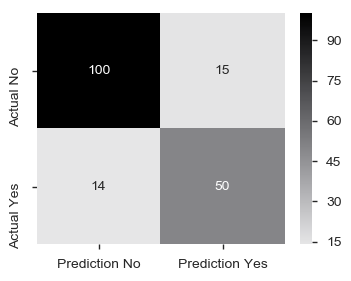

In [334]:
#Confusion Matrix
ab_conf=metrics.confusion_matrix(ab_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(ab_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [335]:
#Classification Report
print(metrics.classification_report(ab_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87       115
         1.0       0.77      0.78      0.78        64

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.84      0.84       179



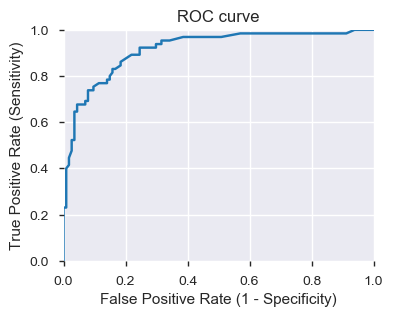

In [336]:
#ROC Curve
predict_probabilities = ab.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### 8.6. Building GradientBoosting Classifier Model <a id='gb'>

In [337]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

In [338]:
#Accuracy Score
gb_acc = metrics.accuracy_score(gb_pred,y_test)
gb_acc

0.8547486033519553

In [339]:
#Train Score
gb_train=gb.score(X_train,y_train)
gb_train

0.8890449438202247

In [340]:
#Test Score
gb_test=gb.score(X_test,y_test)
gb_test

0.8547486033519553

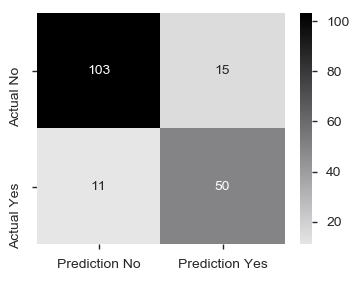

In [341]:
#Confusion Matrix
gb_conf=metrics.confusion_matrix(gb_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(gb_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [342]:
#Classification Report
print(metrics.classification_report(gb_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89       118
         1.0       0.77      0.82      0.79        61

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.86      0.85      0.86       179



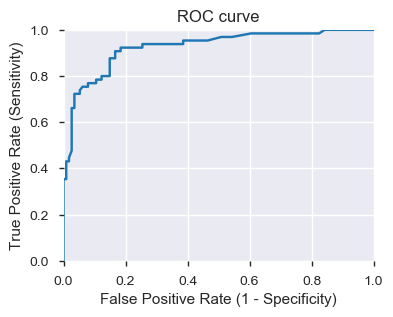

In [343]:
#ROC Curve
predict_probabilities = gb.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### 8.7. Building XGB Classifier Model <a id='xgb'>

In [344]:
xgb= XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

In [345]:
#Accuracy Score
xgb_acc = metrics.accuracy_score(xgb_pred,y_test)
xgb_acc

0.8491620111731844

In [346]:
#Train Score
xgb_train=xgb.score(X_train,y_train)
xgb_train

0.8679775280898876

In [347]:
#Test Score
xgb_test=xgb.score(X_test,y_test)
xgb_test

0.8491620111731844

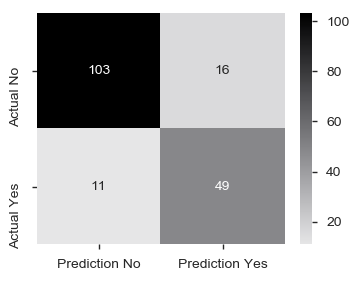

In [348]:
#Confusion Matrix
xgb_conf=metrics.confusion_matrix(xgb_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(xgb_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [349]:
#Classification Report
print(metrics.classification_report(xgb_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88       119
         1.0       0.75      0.82      0.78        60

    accuracy                           0.85       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.85      0.85      0.85       179



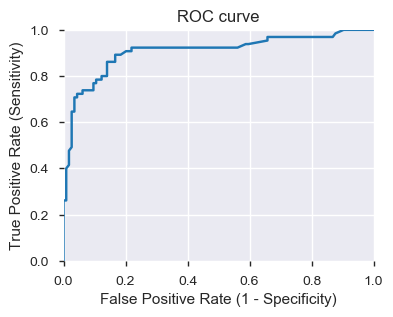

In [350]:
#ROC Curve
predict_probabilities = xgb.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### 8.8. Building LGBM Classifier Model <a id='lgbm'>

In [351]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train,y_train)
lgbm_pred = lgbm.predict(X_test)

In [352]:
#Accuracy Score
lgbm_acc = metrics.accuracy_score(lgbm_pred,y_test)
lgbm_acc

0.8715083798882681

In [353]:
#Train Score
lgbm_train=lgbm.score(X_train,y_train)
lgbm_train

0.8960674157303371

In [354]:
#Test Score
lgbm_test=lgbm.score(X_test,y_test)
lgbm_test

0.8715083798882681

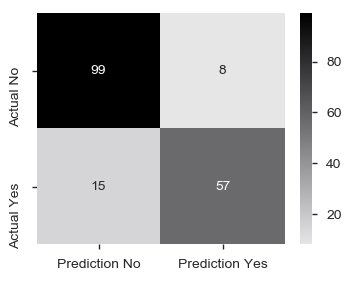

In [355]:
#Confusion Matrix
lgbm_conf=metrics.confusion_matrix(lgbm_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(lgbm_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [356]:
#Classification Report
print(metrics.classification_report(lgbm_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       107
         1.0       0.88      0.79      0.83        72

    accuracy                           0.87       179
   macro avg       0.87      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



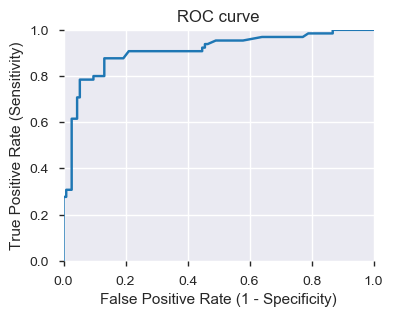

In [357]:
#ROC Curve
predict_probabilities = lgbm.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### 8.9. Building SVM Classifier Model <a id='svm'>

In [358]:
svm = SVC()
svm.fit(X_train,y_train)
svm_pred= svm.predict(X_test)

In [359]:
#Accuracy Score
svm_acc = metrics.accuracy_score(svm_pred,y_test)
svm_acc

0.8603351955307262

In [360]:
#Train Score
svm_train=svm.score(X_train,y_train)
svm_train

0.827247191011236

In [361]:
#Test Score
svm_test=svm.score(X_test,y_test)
svm_test

0.8603351955307262

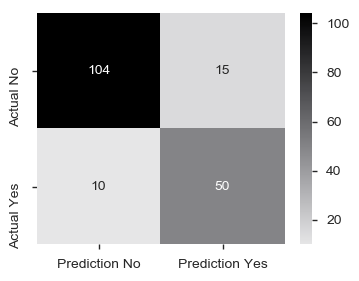

In [362]:
#Confusion Matrix
svm_conf=metrics.confusion_matrix(svm_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(svm_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [363]:
#Classification Report
print(metrics.classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       119
         1.0       0.77      0.83      0.80        60

    accuracy                           0.86       179
   macro avg       0.84      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



## 9. Model Performance Assessment <a id='perform'> 

In [364]:
metrics = {'Metrics': ['Train Score','Test Score','Model Accuracy'],'Logistic Regression':[lr_train,lr_test,lr_acc],
          'Decision Tree Classifier':[dt_train,dt_test,dt_acc],'Random Forest Classifier':[rf_train,rf_test,rf_acc],
           'KNeighborsClassifier':[knn_train,knn_test,knn_acc],'AdaBoostClassifier':[ab_train,ab_test,ab_acc],
          'GradientBoostingClassifier':[gb_train,gb_test,gb_acc],'XG Boost Classifier':[xgb_train,xgb_test,xgb_acc],
           'LGBMClassifier':[lgbm_train,lgbm_test,lgbm_acc],'SVMClassifier':[svm_train,svm_test,svm_acc]}

In [365]:
metrics = pd.DataFrame(metrics)
metrics

,Metrics,Logistic Regression,Decision Tree Classifier,Random Forest Classifier,KNeighborsClassifier,AdaBoostClassifier,GradientBoostingClassifier,XG Boost Classifier,LGBMClassifier,SVMClassifier
0,Train Score,0.810393,0.929775,0.929775,0.852528,0.831461,0.889045,0.867978,0.896067,0.827247
1,Test Score,0.849162,0.843575,0.843575,0.849162,0.837989,0.854749,0.849162,0.871508,0.860335
2,Model Accuracy,0.849162,0.843575,0.843575,0.849162,0.837989,0.854749,0.849162,0.871508,0.860335


## 10. Hyperparameter Tuning <a id='ht'> 

### 10.1. Grid Search Cross Validation<a id='gs'>

#####  Decision Tree Classifier Model

In [366]:
dt_grid = {'max_features' : ['auto', 'sqrt'],
              'max_depth' : np.arange(1,20),
           'criterion':['gini','entropy'],
           "max_leaf_nodes": [20,30],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]}

dt = DecisionTreeClassifier()
dt_gs = GridSearchCV(dt, dt_grid, cv = 3, n_jobs=-1, verbose=2)
dt_gs.fit(X_train, y_train)
dt_gs_pred = dt_gs.predict(X_test)

Fitting 3 folds for each of 1368 candidates, totalling 4104 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1976 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 4104 out of 4104 | elapsed:   10.8s finished


In [367]:
dt_gs.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=19, max_features='sqrt', max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [371]:
#Accuracy Score
dt_tune_gs_acc = metrics.accuracy_score(dt_gs_pred,y_test)
dt_tune_gs_acc

0.8268156424581006

In [372]:
#Train Score
dt_tune_gs_train=dt_gs.score(X_train,y_train)
dt_tune_gs_train

0.8426966292134831

In [373]:
#Test Score
dt_tune_gs_test=dt_gs.score(X_test,y_test)
dt_tune_gs_test

0.8268156424581006

##### Random Forest Classifier Model

In [374]:
rf_grid = {'n_estimators': range(5,20,2),
              'max_features' : ['auto', 'sqrt'],
              'max_depth' : [10,20,30,40],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]}

rf = RandomForestClassifier()
rf_gs = GridSearchCV(rf, rf_grid, cv = 3, n_jobs=-1, verbose=2)

rf_gs.fit(X_train, y_train)
rf_gs_pred = rf_gs.predict(X_test)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:   29.9s finished


In [375]:
rf_gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [376]:
#Accuracy Score
rf_tune_gs_acc = metrics.accuracy_score(rf_gs_pred,y_test)
rf_tune_gs_acc

0.8603351955307262

In [377]:
#Train Score
rf_tune_gs_train=rf_gs.score(X_train,y_train)
rf_tune_gs_train

0.8637640449438202

In [378]:
#Test Score
rf_tune_gs_test=rf_gs.score(X_test,y_test)
rf_tune_gs_test

0.8603351955307262

##### KNeighbors Classifier Model

In [379]:
knn_grid = {'leaf_size':np.arange(1,50),'n_neighbors':np.arange(1,30),'p':[1,2]}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, knn_grid, cv = 3, n_jobs=-1, verbose=2)

knn_gs.fit(X_train, y_train)
knn_gs_pred = knn_gs.predict(X_test)

Fitting 3 folds for each of 2842 candidates, totalling 8526 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1164 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 2296 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 3756 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 5536 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 7644 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8526 out of 8526 | elapsed:  1.3min finished


In [380]:
knn_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')

In [381]:
#Accuracy Score
knn_tune_gs_acc = metrics.accuracy_score(knn_gs_pred,y_test)
knn_tune_gs_acc

0.8770949720670391

In [382]:
#Train Score
knn_tune_gs_train=knn_gs.score(X_train,y_train)
knn_tune_gs_train

0.848314606741573

In [383]:
#Test Score
knn_tune_gs_test=knn_gs.score(X_test,y_test)
knn_tune_gs_test

0.8770949720670391

#####  AdaBoost Classifier Model

In [384]:
ab_grid = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}

ab = AdaBoostClassifier()
ab_gs = GridSearchCV(ab, ab_grid, cv = 3, n_jobs=-1, verbose=2)

ab_gs.fit(X_train, y_train)
ab_gs_pred = ab_gs.predict(X_test)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.3s finished


In [385]:
ab_gs.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=9, random_state=None)

In [386]:
#Accuracy Score
ab_tune_gs_acc = metrics.accuracy_score(ab_gs_pred,y_test)
ab_tune_gs_acc

0.8324022346368715

In [387]:
#Train Score
ab_tune_gs_train=ab_gs.score(X_train,y_train)
ab_tune_gs_train

0.8146067415730337

In [388]:
#Test Score
ab_tune_gs_test=ab_gs.score(X_test,y_test)
ab_tune_gs_test

0.8324022346368715

##### Gradient Boosting Classifier Model

In [389]:
gb_grid = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}

gb = GradientBoostingClassifier()
gb_gs = GridSearchCV(gb, gb_grid, cv = 3, n_jobs=-1, verbose=2)

gb_gs.fit(X_train, y_train)
gb_gs_pred = gb_gs.predict(X_test)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.2s finished


In [390]:
gb_gs.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=13,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [391]:
#Accuracy Score
gb_tune_gs_acc = metrics.accuracy_score(gb_gs_pred,y_test)
gb_tune_gs_acc

0.8491620111731844

In [392]:
#Train Score
gb_tune_gs_train=gb_gs.score(X_train,y_train)
gb_tune_gs_train

0.8764044943820225

In [393]:
#Test Score
gb_tune_gs_test=gb_gs.score(X_test,y_test)
gb_tune_gs_test

0.8491620111731844

##### XG Boost Classifier Model 

In [394]:
xgb_grid = {"max_depth": [10,15,20,30],
              "n_estimators": range(5,20,2) , 
              "gamma": [0.03,0.05], 
              "learning_rate": [0.01,0.05]}

xgb = XGBClassifier()
xgb_gs = GridSearchCV(xgb, xgb_grid, cv = 3, n_jobs=-1, verbose=2)

xgb_gs.fit(X_train, y_train)
xgb_gs_pred = xgb_gs.predict(X_test)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 377 out of 384 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    4.9s finished


In [395]:
xgb_gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.03,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=17, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [396]:
#Accuracy Score
xgb_tune_gs_acc = metrics.accuracy_score(xgb_gs_pred,y_test)
xgb_tune_gs_acc

0.8659217877094972

In [397]:
#Train Score
xgb_tune_gs_train=xgb_gs.score(X_train,y_train)
xgb_tune_gs_train

0.8721910112359551

In [398]:
#Test Score
xgb_tune_gs_test=xgb_gs.score(X_test,y_test)
xgb_tune_gs_test

0.8659217877094972

##### LGBM Classifier Model

In [399]:
lgbm_grid = {"max_depth": [10,15,20,30],
              "n_estimators": range(5,20,2), 
              "learning_rate": [0.01,0.05]}

lgbm = lgb.LGBMClassifier()
lgbm_gs = GridSearchCV(lgbm, lgbm_grid, cv = 3, n_jobs=-1, verbose=2)

lgbm_gs.fit(X_train, y_train)
lgbm_gs_pred = lgbm_gs.predict(X_test)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    3.1s finished


In [400]:
lgbm_gs.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=17, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [401]:
#Accuracy Score
lgbm_tune_gs_acc = metrics.accuracy_score(lgbm_gs_pred,y_test)
lgbm_tune_gs_acc

0.8435754189944135

In [402]:
#Train Score
lgbm_tune_gs_train=lgbm_gs.score(X_train,y_train)
lgbm_tune_gs_train

0.8314606741573034

In [403]:
#Test Score
lgbm_tune_gs_test=lgbm_gs.score(X_test,y_test)
lgbm_tune_gs_test

0.8435754189944135

##### SVM Classifier Model

In [404]:
svm_grid = {'kernel':['linear','rbf'],'decision_function_shape': ['ovr','ovr'],'class_weight':['balanced', None]}

svm = SVC()
svm_gs = GridSearchCV(svm, svm_grid, cv = 3, n_jobs=-1, verbose=2)

svm_gs.fit(X_train, y_train)
svm_gs_pred = svm_gs.predict(X_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.5s finished


In [405]:
svm_gs.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [406]:
svm_tune_gs_acc = metrics.accuracy_score(svm_gs_pred,y_test)
svm_tune_gs_acc

0.8603351955307262

In [407]:
#Train Score
svm_tune_gs_train=svm_gs.score(X_train,y_train)
svm_tune_gs_train

0.827247191011236

In [408]:
#Test Score
svm_tune_gs_test=svm_gs.score(X_test,y_test)
svm_tune_gs_test

0.8603351955307262

### 10.2. Randomized Search Cross Validation<a id='rs'>

##### Decision Tree Classifier Model

In [409]:
#Finding optimal parameters using Randomized Search CV
params1 = {'max_depth': np.arange(1,20),'criterion':['gini','entropy'],"max_leaf_nodes": [20,30]}
dt = DecisionTreeClassifier()
tree = RandomizedSearchCV(dt, params1, cv=3 , return_train_score = True)
tree.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [410]:
tree.best_params_

{'max_leaf_nodes': 30, 'max_depth': 5, 'criterion': 'entropy'}

In [411]:
dtr = DecisionTreeClassifier(criterion='gini',max_depth=12,max_leaf_nodes=30)
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)

In [412]:
#Accuracy Score
dt_tune_rs_acc = metrics.accuracy_score(dtr_pred,y_test)
dt_tune_rs_acc

0.8491620111731844

In [413]:
#Train Score
dt_tune_rs_train=dtr.score(X_train,y_train)
dt_tune_rs_train

0.8792134831460674

In [414]:
#Test Score
dt_tune_rs_test=dtr.score(X_test,y_test)
dt_tune_rs_test

0.8491620111731844

##### Random Forest Classifier Model

In [415]:
#Finding optimal parameters using Randomized Search CV
params2 = {'n_estimators': np.arange(1,20),'criterion':['entropy','gini'],'max_leaf_nodes':[10,20,30],'max_depth':np.arange(1,20)}
rf = RandomForestClassifier()
forest = RandomizedSearchCV(rf, params2, cv=3 , return_train_score = True)
forest.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [416]:
forest.best_params_

{'n_estimators': 15, 'max_leaf_nodes': 30, 'max_depth': 8, 'criterion': 'gini'}

In [417]:
rfr = RandomForestClassifier(criterion='gini',max_depth=8,n_estimators=4,max_leaf_nodes=30)
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)

In [418]:
#Accuracy Score
rf_tune_rs_acc = metrics.accuracy_score(rfr_pred,y_test)
rf_tune_rs_acc

0.8435754189944135

In [419]:
#Train Score
rf_tune_rs_train=rfr.score(X_train,y_train)
rf_tune_rs_train

0.8609550561797753

In [420]:
#Test Score
rf_tune_rs_test=rfr.score(X_test,y_test)
rf_tune_rs_test

0.8435754189944135

##### KNeighbors Classifier Model

In [421]:
#Finding optimal parameters using Randomized Search CV
params3 = {'leaf_size':np.arange(1,50),'n_neighbors':np.arange(1,30),'p':[1,2]}
knn = KNeighborsClassifier()
neighbor = RandomizedSearchCV(knn, params3, cv=3 , return_train_score = True)
neighbor.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
             

In [422]:
neighbor.best_params_

{'p': 2, 'n_neighbors': 28, 'leaf_size': 4}

In [423]:
knnr = KNeighborsClassifier(n_neighbors=28,leaf_size=28, p=2)
knnr.fit(X_train,y_train)
knnr_pred = knnr.predict(X_test)

In [424]:
#Accuracy Score
knn_tune_rs_acc = metrics.accuracy_score(knnr_pred,y_test)
knn_tune_rs_acc

0.8715083798882681

In [425]:
#Train Score
knn_tune_rs_train=knnr.score(X_train,y_train)
knn_tune_rs_train

0.827247191011236

In [426]:
#Test Score
knn_tune_rs_test=knnr.score(X_test,y_test)
knn_tune_rs_test

0.8715083798882681

##### AdaBoost Classifier Model

In [427]:
#Finding optimal parameters using Randomized Search CV
params4 = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}
ab = AdaBoostClassifier()
AB = RandomizedSearchCV(ab,param_distributions=params4,
                           cv = 5,
                           n_jobs=-1,
                           verbose=2)
AB.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'n_estimators': range(5, 20, 2)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [428]:
AB.best_params_

{'n_estimators': 19, 'learning_rate': 0.5}

In [430]:
abr = AdaBoostClassifier(n_estimators=15,learning_rate=1)
abr.fit(X_train,y_train)
abr_pred = abr.predict(X_test)

In [431]:
#Accuracy Score
ab_tune_rs_acc = metrics.accuracy_score(abr_pred,y_test)
ab_tune_rs_acc

0.8324022346368715

In [432]:
#Train Score
ab_tune_rs_train=abr.score(X_train,y_train)
ab_tune_rs_train

0.824438202247191

In [433]:
#Test Score
ab_tune_rs_test=abr.score(X_test,y_test)
ab_tune_rs_test

0.8324022346368715

##### Gradient Boosting Classifier Model

In [434]:
#Finding optimal parameters using Randomized Search CV
params5 = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}
gb = GradientBoostingClassifier()
GB = RandomizedSearchCV(gb,param_distributions=params5,
                           cv = 5,
                           n_jobs=-1,
                           verbose=2)
GB.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [435]:
GB.best_params_

{'n_estimators': 15, 'learning_rate': 1}

In [436]:
gbr = GradientBoostingClassifier(n_estimators=17,learning_rate=1)
gbr.fit(X_train,y_train)
gbr_pred = gbr.predict(X_test)

In [437]:
#Accuracy Score
gb_tune_rs_acc = metrics.accuracy_score(gbr_pred,y_test)
gb_tune_rs_acc

0.888268156424581

In [438]:
#Train Score
gb_tune_rs_train=gbr.score(X_train,y_train)
gb_tune_rs_train

0.9002808988764045

In [439]:
#Test Score
gb_tune_rs_test=gbr.score(X_test,y_test)
gb_tune_rs_test

0.888268156424581

##### XG Boost Classifier Model

In [440]:
#Finding optimal parameters using Randomized Search CV
params6 = {"max_depth": [10,15,20,30],
              "n_estimators": range(5,20,2) , 
              "gamma": [0.03,0.05], 
              "learning_rate": [0.01,0.05]}
 
xgb = XGBClassifier()
XGB = RandomizedSearchCV(xgb,param_distributions=params6,
                           cv = 5)
XGB.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [441]:
XGB.best_params_

{'n_estimators': 17, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.05}

In [442]:
xgbr = XGBClassifier(n_estimators=13,max_depth=20,learning_rate=0.01,gamma=0.05)
xgbr.fit(X_train,y_train)
xgbr_pred = xgbr.predict(X_test)

In [443]:
#Accuracy Score
xgb_tune_rs_acc = metrics.accuracy_score(xgbr_pred,y_test)
xgb_tune_rs_acc

0.8603351955307262

In [444]:
#Train Score
xgb_tune_rs_train=xgbr.score(X_train,y_train)
xgb_tune_rs_train

0.875

In [445]:
#Test Score
xgb_tune_rs_test=xgbr.score(X_test,y_test)
xgb_tune_rs_test

0.8603351955307262

##### LGBM Classifier Model

In [446]:
#Finding optimal parameters using Randomized Search CV
params7 = {"max_depth": [10,15,20,30],
              "n_estimators": range(5,20,2), 
              "learning_rate": [0.01,0.05]} 
lgbm = lgb.LGBMClassifier()
LGBM = RandomizedSearchCV(lgbm,param_distributions=params7,
                           cv = 5)
LGBM.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                                            subsample=1.0,
                                            subsample_for_bin

In [447]:
LGBM.best_params_

{'n_estimators': 19, 'max_depth': 30, 'learning_rate': 0.05}

In [448]:
lgbmr = lgb.LGBMClassifier(n_estimators=19,max_depth=30,learning_rate=0.05)
lgbmr.fit(X_train,y_train)
lgbmr_pred = lgbmr.predict(X_test)

In [449]:
#Accuracy Score
lgbm_tune_rs_acc = metrics.accuracy_score(lgbmr_pred,y_test)
lgbm_tune_rs_acc

0.8379888268156425

In [450]:
#Train Score
lgbm_tune_rs_train=lgbmr.score(X_train,y_train)
lgbm_tune_rs_train

0.8455056179775281

In [451]:
#Test Score
lgbm_tune_rs_test=lgbmr.score(X_test,y_test)
lgbm_tune_rs_test

0.8379888268156425

##### SVM Classifier Model

In [452]:
#Finding optimal parameters using Randomized Search CV
params8 = {'kernel':['linear','rbf'],'decision_function_shape': ['ovr','ovr'],'class_weight':['balanced', None]} 
svm = SVC()
SVM = RandomizedSearchCV(svm,param_distributions=params8,
                           cv = 5)
SVM.fit(X,y)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'class_weight': ['balanced', None],
                                        'decision_function_shape': ['ovr',
                                                                    'ovr'],
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [453]:
SVM.best_params_

{'kernel': 'rbf', 'decision_function_shape': 'ovr', 'class_weight': None}

In [454]:
svmr = SVC(kernel ='rbf',decision_function_shape = 'ovr',class_weight=None)
svmr.fit(X_train,y_train)
svmr_pred = svmr.predict(X_test)

In [455]:
#Accuracy Score
svm_tune_rs_acc = metrics.accuracy_score(svmr_pred,y_test)
svm_tune_rs_acc

0.8603351955307262

In [456]:
#Train Score
svm_tune_rs_train=svmr.score(X_train,y_train)
svm_tune_rs_train

0.827247191011236

In [457]:
#Test Score
svm_tune_rs_test=svmr.score(X_test,y_test)
svm_tune_rs_test

0.8603351955307262

## 11. Comparing all Learning Algorithem after Hyperparameter Tuning <a id='comparehp'> 

In [458]:
#Creating dictionary for all the metrics and models
metrics = {'Metrics': ['Train Score','Train Score after GridSearchCV','Train Score after RandomizedSearchCV','Test Score','Test Score after GridSearchCV','Test Score after RandomizedSearchCV','Model Accuracy','Model Accuracy after GridSearchCV','Model Accuracy after RandomizedSearchCV'],'Logistic Regression':[lr_train,'NA','NA',lr_test,'NA','NA',lr_acc,'NA','NA'],
          'Decision Tree Classifier':[dt_train,dt_tune_gs_train,dt_tune_rs_train,dt_test,dt_tune_gs_test,dt_tune_rs_test,dt_acc,dt_tune_gs_acc,dt_tune_rs_acc],'Ramdom Forest Classifier':[rf_train,rf_tune_gs_train,rf_tune_rs_train,rf_test,rf_tune_gs_test,rf_tune_rs_test,rf_acc,rf_tune_gs_acc,rf_tune_rs_acc],'KNearestNeighbor Classifier':[knn_train,knn_tune_gs_train,knn_tune_rs_train,knn_test,knn_tune_gs_test,knn_tune_rs_test,knn_acc,knn_tune_gs_acc,knn_tune_rs_acc],'Ada Boost Classifier':[ab_train,ab_tune_gs_train,ab_tune_rs_train,ab_test,ab_tune_gs_test,ab_tune_rs_test,ab_acc,ab_tune_gs_acc,ab_tune_rs_acc],'Gradient Boosting Classifier':[gb_train,gb_tune_gs_train,gb_tune_rs_train,gb_test,gb_tune_gs_test,gb_tune_rs_test,gb_acc,gb_tune_gs_acc,gb_tune_rs_acc],
          'XG Boost Classifier':[xgb_train,xgb_tune_gs_train,xgb_tune_rs_train,xgb_test,xgb_tune_gs_test,xgb_tune_rs_test,xgb_acc,xgb_tune_gs_acc,xgb_tune_rs_acc],'LGBM Classifier':[lgbm_train,lgbm_tune_gs_train,lgbm_tune_rs_train,lgbm_test,lgbm_tune_gs_test,lgbm_tune_rs_test,lgbm_acc,lgbm_tune_gs_acc,lgbm_tune_rs_acc],'Support Vector Classifier':[svm_train,svm_tune_gs_train,svm_tune_rs_train,svm_test,svm_tune_gs_test,svm_tune_rs_test,svm_acc,svm_tune_gs_acc,svm_tune_rs_acc]}

In [459]:
#Converting dictionary to dataframe
metrics = pd.DataFrame(metrics)
metrics

,Metrics,Logistic Regression,Decision Tree Classifier,Ramdom Forest Classifier,KNearestNeighbor Classifier,Ada Boost Classifier,Gradient Boosting Classifier,XG Boost Classifier,LGBM Classifier,Support Vector Classifier
0,Train Score,0.810393,0.929775,0.929775,0.852528,0.831461,0.889045,0.867978,0.896067,0.827247
1,Train Score after GridSearchCV,NA,0.842697,0.863764,0.848315,0.814607,0.876404,0.872191,0.831461,0.827247
2,Train Score after RandomizedSearchCV,NA,0.879213,0.860955,0.827247,0.824438,0.900281,0.875000,0.845506,0.827247
3,Test Score,0.849162,0.843575,0.843575,0.849162,0.837989,0.854749,0.849162,0.871508,0.860335
4,Test Score after GridSearchCV,NA,0.826816,0.860335,0.877095,0.832402,0.849162,0.865922,0.843575,0.860335
5,Test Score after RandomizedSearchCV,NA,0.849162,0.843575,0.871508,0.832402,0.888268,0.860335,0.837989,0.860335
6,Model Accuracy,0.849162,0.843575,0.843575,0.849162,0.837989,0.854749,0.849162,0.871508,0.860335
7,Model Accuracy after GridSearchCV,NA,0.826816,0.860335,0.877095,0.832402,0.849162,0.865922,0.843575,0.860335
8,Model Accuracy after RandomizedSearchCV,NA,0.849162,0.843575,0.871508,0.832402,0.888268,0.860335,0.837989,0.860335


##### Comparing all the models Gradient Boosting Classifier,KNeighbor Classifier and Random Forest Classifier are good models

## 12. Stacking Models <a id='stacking'> 

### 12.1. Voting Classifier<a id='voting'>

In [460]:
#Assigning estimator models for voting classifier
vote_est = [('rf_gs',rf_gs),('knn_gs',knn_gs),('gbr',gbr)]

In [468]:
vote = VotingClassifier(estimators=vote_est,voting='soft')
vote.fit(X_train,y_train)
vote_pred = vote.predict(X_test)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:   27.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 2842 candidates, totalling 8526 fits


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 5760 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 7868 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 8519 out of 8526 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 8526 out of 8526 | elapsed:  1.2min finished


In [469]:
#Accuracy Score
vote_acc = metrics.accuracy_score(vote_pred,y_test)
vote_acc

0.8938547486033519

In [470]:
#Train Score
vote_train=vote.score(X_train,y_train)
vote_train

0.8834269662921348

In [471]:
#Test Score
vote_test=vote.score(X_test,y_test)
vote_test

0.8938547486033519

### 12.2. Mlxtend Classifier<a id='mlxtend'>

In [472]:
#Fitting and training the model
st = StackingClassifier(classifiers=[rf_gs,knn_gs,gbr],meta_classifier=lr)
st.fit(X_train,y_train)
st_pred = st.predict(X_test)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:   29.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 2842 candidates, totalling 8526 fits


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 5760 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 7868 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8526 out of 8526 | elapsed:  1.3min finished


In [473]:
#Accuracy Score
st_acc = metrics.accuracy_score(st_pred,y_test)
st_acc

0.888268156424581

In [474]:
#Train Score
st_train=st.score(X_train,y_train)
st_train

0.9002808988764045

In [475]:
#Test Score
st_test=st.score(X_test,y_test)
st_test

0.888268156424581

In [476]:
#Creating dictionary for all the metrics and converting it to dataframe
metrics_stack = {'Models': ['Voting Classifier','Stacking Classifier'],'Train score':[vote_train,st_train],'Test Score':[vote_test,st_test],'Model Accuracy':[vote_acc,st_acc]}
metrics_stack = pd.DataFrame(metrics_stack)
metrics_stack

,Models,Train score,Test Score,Model Accuracy
0,Voting Classifier,0.883427,0.893855,0.893855
1,Stacking Classifier,0.900281,0.888268,0.888268


**The best model being Voting Classifier**

###  12.3. Vecstack<a id='vecstack'>

In [234]:
#1st level model
models = [rf,knn,gbr]
S_train, S_test = stacking(models, X_train, y_train, X_test, 
    regression = False, metric = metrics.accuracy_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    fold  0:  [0.77528090]
    fold  1:  [0.83707865]
    fold  2:  [0.80337079]
    fold  3:  [0.78651685]
    ----
    MEAN:     [0.80056180] + [0.02333321]
    FULL:     [0.80056180]

model  1:     [KNeighborsClassifier]
    fold  0:  [0.74719101]
    fold  1:  [0.82022472]
    fold  2:  [0.80337079]
    fold  3:  [0.78089888]
    ----
    MEAN:     [0.78792135] + [0.02734259]
    FULL:     [0.78792135]

model  2:     [GradientBoostingClassifier]
    fold  0:  [0.77528090]
    fold  1:  [0.85393258]
    fold  2:  [0.82584270]
    fold  3:  [0.81460674]
    ----
    MEAN:     [0.81741573] + [0.02822999]
    FULL:     [0.81741573]



In [235]:
#2nd level model
models = [dt,xgb,gb,ab]
S_train, S_test = stacking(models, X_train, y_train, X_test, 
    regression = False, metric = metrics.accuracy_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.75842697]
    fold  1:  [0.83707865]
    fold  2:  [0.80337079]
    fold  3:  [0.75842697]
    ----
    MEAN:     [0.78932584] + [0.03311749]
    FULL:     [0.78932584]

model  1:     [XGBClassifier]
    fold  0:  [0.78089888]
    fold  1:  [0.84269663]
    fold  2:  [0.83707865]
    fold  3:  [0.80337079]
    ----
    MEAN:     [0.81601124] + [0.02524185]
    FULL:     [0.81601124]

model  2:     [GradientBoostingClassifier]
    fold  0:  [0.78089888]
    fold  1:  [0.83146067]
    fold  2:  [0.83146067]
    fold  3:  [0.83707865]
    ----
    MEAN:     [0.82022472] + [0.02282033]
    FULL:     [0.82022472]

model  3:     [AdaBoostClassifier]
    fold  0:  [0.73595506]
    fold  1:  [0.80898876]
    fold  2:  [0.80898876]
    fold  3:  [0.80898876]
    ----
    MEAN:     [0.79073034] + [0.03162452]
    F

 **From the above analysis,the best model is being Voting Classifier**

## 13. Model Explanability <a id='explain'> 

### 13.1. Eli5<a id='eli5'>

In [236]:
#Finding the importance of columns for prediction
perm = PermutationImportance(vote, random_state=1).fit(X_test,vote_pred)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1654 ± 0.0428,Title_2
0.0883 ± 0.0217,Ftotal
0.0860 ± 0.0416,Fare
0.0413 ± 0.0261,PClass_3
0.0279 ± 0.0122,Sex_male
0.0235 ± 0.0084,Emb_S
0.0156 ± 0.0084,Title_1
0.0145 ± 0.0055,Title_3
0.0134 ± 0.0114,PClass_2
0.0134 ± 0.0114,Age Group


In [ ]:
#Understanding how each feature influences the prediction
ind=4
eli5.show_prediction(model_fit, doc=X_test.iloc[[ind]], feature_names=list(X_test.columns))

### 13.2. LIME<a id='lime'>

In [238]:
#Find caegorical features
categorical_features = np.argwhere(np.array([len(set(X_test.values[:,x])) for x in range(X_test.values.shape[1])]) <= 10).flatten()
#Lime explainer for regression
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values,
feature_names=X_test.columns.values.tolist(),
class_names=['default'],
categorical_features=categorical_features,
verbose=True, mode='regression')
ind = 4
#Fit on test data
exp = explainer.explain_instance(X_test.values[ind], vote.predict, num_features=3)
#Show in notebook features influencing predictions
exp.show_in_notebook(show_table=True)

Intercept 0.7835078917118401
Prediction_local [-0.064225]
Right: 0.0


### 13.3. SHAP<a id='shap'>

In [ ]:
#Create explainer for linear model
explainer = shap.LinearExplainer(vote,data=X_test.values)
shap_values = explainer.shap_values(X_test)

In [ ]:
#Understanding how each feature influences the prediction
shap.initjs()
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test.iloc[ind,:],
    feature_names=X_test.columns.tolist()
)

In [ ]:
shap.summary_plot(shap_values,X_test)

In [ ]:
shap.dependence_plot("balance", shap_values, X_test)

## 14. Closing Remarks <a id='close'> 

**I barely remember first when exactly I watched Titanic movie but still now Titanic remains a discussion subject in the most diverse areas.In this assignment, we're asked to complete the analysis of what sorts of people were likely to survive. In particular, we're asked to apply the tools of machine learning to predict which passengers survived the tragedy.Now after analysing we have come with a model i.e. "Voting Classifier" that predicts pretty well having accuracy score of around 90%.**